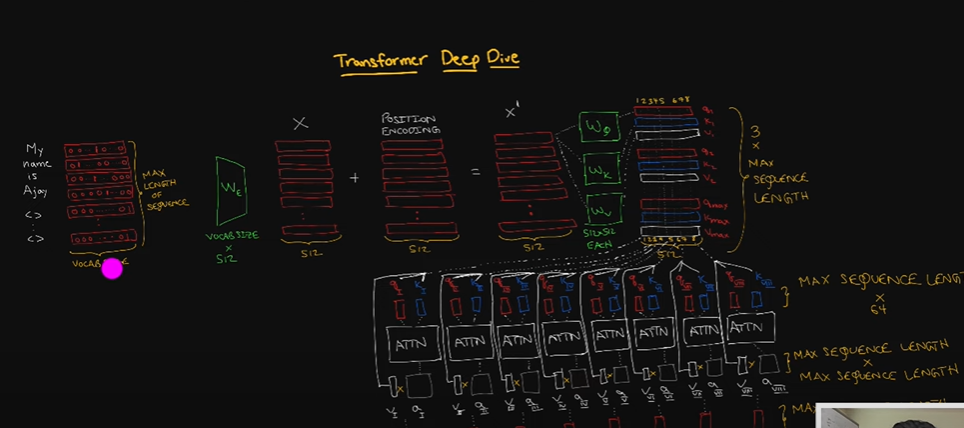

#### gamma and beta are the learnable parameters
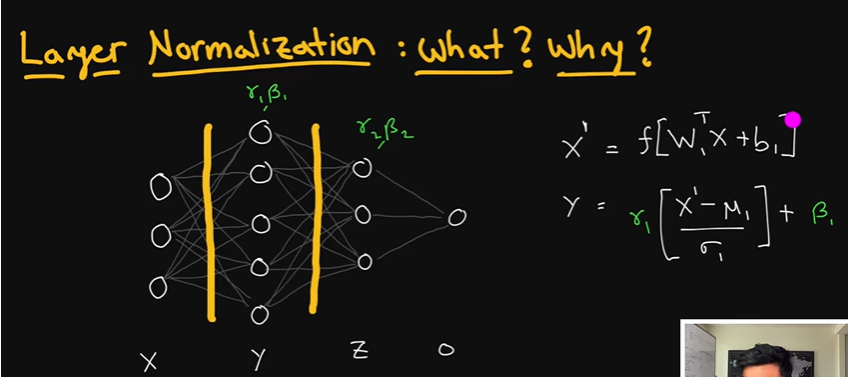
 
 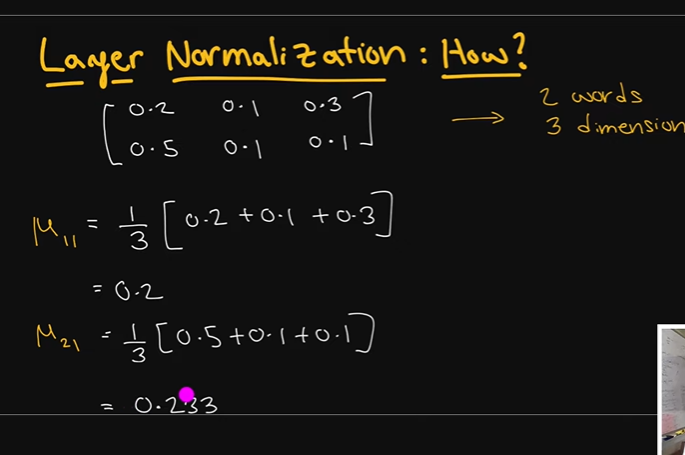

In [18]:
import torch
from torch import nn
import numpy as np

In [2]:
inputs = torch.Tensor([[[0.2, 0.1, 0.3],
                        [0.5, 0.1, 0.1]]])
B, S, E = inputs.size()
inputs = inputs.reshape(S, B, E)
inputs.size()
     

torch.Size([2, 1, 3])

In [3]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta =  nn.Parameter(torch.zeros(parameter_shape))

In [8]:
parameter_shape

torch.Size([1, 3])

In [4]:
gamma.size(), beta.size()

(torch.Size([1, 3]), torch.Size([1, 3]))

In [5]:
gamma, beta

(Parameter containing:
 tensor([[1., 1., 1.]], requires_grad=True),
 Parameter containing:
 tensor([[0., 0., 0.]], requires_grad=True))

In [6]:
dims = [-(i+1) for i in range(len(parameter_shape))]

In [7]:
dims # batch and layer dimension


[-1, -2]

In [14]:
inputs #[2, 1, 3]


tensor([[[0.2000, 0.1000, 0.3000]],

        [[0.5000, 0.1000, 0.1000]]])

In [30]:
np.random.seed(2)
myinputs = np.random.rand(2,2,3)

myinputs = torch.from_numpy(myinputs)
myinputs

tensor([[[0.4360, 0.0259, 0.5497],
         [0.4353, 0.4204, 0.3303]],

        [[0.2046, 0.6193, 0.2997],
         [0.2668, 0.6211, 0.5291]]], dtype=torch.float64)

In [55]:
parameter_shape3 = myinputs.size()[-1:]
parameter_shape3

torch.Size([3])

In [61]:
mydim = [-(i+1) for i in range(len(parameter_shape3))]
mydim

[-1]

In [59]:
myinputs.mean(dim=mydim, keepdim=True)

tensor([[[0.3372],
         [0.3953]],

        [[0.3745],
         [0.4724]]], dtype=torch.float64)

In [38]:
myinputs[-1]

tensor([[0.2046, 0.6193, 0.2997],
        [0.2668, 0.6211, 0.5291]], dtype=torch.float64)

In [37]:
inputs[-2]

tensor([[0.2000, 0.1000, 0.3000]])

In [10]:
mean = inputs.mean(dim=dims, keepdim=True)
mean #[2, 1, 1]

tensor([[[0.2000]],

        [[0.2333]]])

In [21]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[0.0817]],

        [[0.1886]]])

In [19]:

y = (inputs - mean) / std
y
     

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]])

In [22]:

out = gamma * y + beta

out

tensor([[[ 0.0000, -1.2238,  1.2238]],

        [[ 1.4140, -0.7070, -0.7070]]], grad_fn=<AddBackward0>)

In [49]:
import torch
from torch import nn

class LayerNormalization():
    
    def __init__(self, parameters_shape, eps=1e-5):
           
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))
    def forward(self, input):
        
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)
        print(f"Mean \n ({mean.size()}): \n {mean}")
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        print(f"Standard Deviation \n ({std.size()}): \n {std}")
        y = (inputs - mean) / std
        print(f"y \n ({y.size()}) = \n {y}")
        out = self.gamma * y  + self.beta
        print(f"out \n ({out.size()}) = \n {out}")
        return out
        
        

In [50]:

batch_size = 3
sentence_length = 5
embedding_dim = 8 
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")
     

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-6.5964e-01,  2.0129e+00,  1.4324e+00,  6.9344e-02, -3.9026e-01,
           1.5698e+00,  8.5677e-01, -1.0615e+00],
         [-1.5813e+00, -4.3079e-01, -7.9624e-01,  8.1733e-04, -9.7150e-02,
          -2.3740e+00, -8.8825e-01, -1.3921e+00],
         [ 7.8387e-01,  6.3824e-01,  5.5023e-01, -1.1564e+00, -1.4919e+00,
          -4.5922e-02,  9.9387e-02, -8.0656e-02]],

        [[ 1.3065e+00,  2.3203e+00, -5.4181e-02, -1.0897e+00, -3.5962e-01,
          -5.3137e-01,  1.1048e+00, -8.4253e-01],
         [ 1.9603e+00,  5.7796e-01,  3.0682e-01,  3.0445e-01, -4.8554e-01,
           5.7093e-01,  6.1718e-01,  3.9445e-01],
         [-8.1139e-01,  6.5160e-01, -9.1511e-01,  3.0909e-01,  7.1003e-01,
           7.8267e-01,  8.5993e-01, -8.3451e-01]],

        [[-1.9197e-01, -6.7111e-01,  9.9116e-01,  9.4091e-01,  1.7449e+00,
          -1.1210e+00,  5.7348e-01,  1.2097e+00],
         [ 1.1517e+00, -1.1948e+00,  7.3566e-01, -8.6137e-01,  7.6193e-01,
          

In [51]:
layer_norm = LayerNormalization(inputs.size()[-1:])

In [54]:
inputs.size()[-1:]

torch.Size([8])

In [52]:
out = layer_norm.forward(inputs)

Mean 
 (torch.Size([5, 3, 1])): 
 tensor([[[ 0.4787],
         [-0.9449],
         [-0.0879]],

        [[ 0.2318],
         [ 0.5308],
         [ 0.0940]],

        [[ 0.4345],
         [-0.0651],
         [-0.0843]],

        [[-0.1104],
         [-0.0157],
         [-0.3131]],

        [[ 0.5377],
         [-0.1874],
         [-0.0238]]])
Standard Deviation 
 (torch.Size([5, 3, 1])): 
 tensor([[[1.0717],
         [0.7542],
         [0.7782]],

        [[1.1288],
         [0.6332],
         [0.7498]],

        [[0.9313],
         [0.9100],
         [0.6216]],

        [[0.6509],
         [0.7416],
         [0.6333]],

        [[0.7624],
         [0.8759],
         [0.6848]]])
y 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-1.0622,  1.4316,  0.8899, -0.3820, -0.8109,  1.0181,  0.3528,
          -1.4373],
         [-0.8438,  0.6817,  0.1971,  1.2540,  1.1241, -1.8950,  0.0751,
          -0.5930],
         [ 1.1203,  0.9331,  0.8200, -1.3731, -1.8043,  0.0539,  0.2407,
           0.0093]],



In [27]:

out[0].mean(), out[0].std()
     

(tensor(-9.9341e-09, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))